In [1]:
# load the library tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.5     
✔ tibble  2.1.1          ✔ dplyr   0.8.0.1   
✔ tidyr   0.8.0          ✔ stringr 1.3.1     
✔ readr   1.1.1          ✔ forcats 0.3.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
# read the data sets
errtypes = read_csv('Err_Types.csv') # the data on the types of errors
head(errtypes)
maedata = read_csv('MAE_Data.csv') # the data on the medication administration errors totalled
head(maedata) # view the data

Parsed with column specification:
cols(
  Fac = col_character(),
  B_A = col_character(),
  Date = col_character(),
  Care_Level = col_character(),
  Wrong_Resident = col_integer(),
  Wrong_Dose = col_integer(),
  Wrong_Time = col_integer(),
  Wrong_Day = col_integer(),
  Pill_Found = col_integer(),
  Not_Given = col_integer(),
  Med_React = col_integer(),
  Other = col_integer()
)


Fac,B_A,Date,Care_Level,Wrong_Resident,Wrong_Dose,Wrong_Time,Wrong_Day,Pill_Found,Not_Given,Med_React,Other
D1,Before,Jan-16,Dementia,0,0,0,0,0,0,0,0
D1,Before,Feb-16,Dementia,0,0,0,0,0,0,0,0
D1,Before,Mar-16,Dementia,0,0,0,0,0,0,0,0
D1,Before,Apr-16,Dementia,0,0,0,0,0,0,0,0
D1,Before,May-16,Dementia,0,1,0,0,0,0,0,0
D1,Before,Jun-16,Dementia,0,0,1,0,0,0,0,0


Parsed with column specification:
cols(
  Fac = col_character(),
  B_A = col_character(),
  Date = col_character(),
  MAE = col_integer(),
  OBR = col_integer(),
  `Care Level` = col_character()
)


Fac,B_A,Date,MAE,OBR,Care Level
D1,Before,Jan-16,0,1171,Dementia
D1,Before,Feb-16,0,1115,Dementia
D1,Before,Mar-16,0,1175,Dementia
D1,Before,Apr-16,0,1176,Dementia
D1,Before,May-16,1,1134,Dementia
D1,Before,Jun-16,1,1079,Dementia


In [10]:
# Different counts
maedata %>%
 count(Fac) # distribution for dementia (D*), Intellectual disability (I*), and Residential care (R*)
maedata %>%
 count(B_A) # Before introduction of EMSS and After introduction of EMSS
maedata %>%
 count(MAE) # total count of MAE
maedata %>%
 count(`Care Level`) # Levels of care, dementia/intellectual/rest home

Fac,n
D1,33
D2,33
D3,33
D4,33
D5,33
D6,33
I1,33
R1,33
R2,33


B_A,n
After,125
Before,172


MAE,n
0,154
1,77
2,40
3,11
4,6
5,5
6,1
7,2
25,1


Care Level,n
Dementia,198
Intellectual,33
Rest Home,66


In [103]:
# errors by intervention (before after)
prelims = maedata %>%
 count(MAE, B_A) %>%
 spread(B_A, n)
prelims

MAE,After,Before
0,67,87
1,31,46
2,18,22
3,3,8
4,3,3
5,1,4
6,NA,1
7,1,1
25,1,NA


In [105]:
# Add a new variable mae_cat
# categorisation of mae to 4 categories, 0, 1, 2, 3, 4 or more
maedata1 = maedata %>%
            mutate(mae_cat = if_else(MAE %in% 0, 0, if_else(MAE %in% 1, 1, if_else(MAE %in% 2, 2, 
                                                                                  if_else(MAE %in% 3, 3, 4)) )))

In [107]:
# Compare the percentages
comparisons = maedata1 %>%
 count(mae_cat, B_A, `Care Level`) %>%
 spread(B_A, n) %>%
 
 mutate(afpct = After/sum(After + Before),
       befpct = Before/sum(After + Before),
       pct_reductions = (Before - After)*100/Before )
comparisons

mae_cat,Care Level,After,Before,afpct,befpct,pct_reductions
0,Dementia,48,62,NA,NA,22.58065
0,Intellectual,4,8,NA,NA,50.00000
0,Rest Home,15,17,NA,NA,11.76471
1,Dementia,18,30,NA,NA,40.00000
1,Intellectual,5,8,NA,NA,37.50000
1,Rest Home,8,8,NA,NA,0.00000
2,Dementia,11,13,NA,NA,15.38462
2,Intellectual,2,3,NA,NA,33.33333
2,Rest Home,5,6,NA,NA,16.66667
3,Dementia,2,4,NA,NA,50.00000


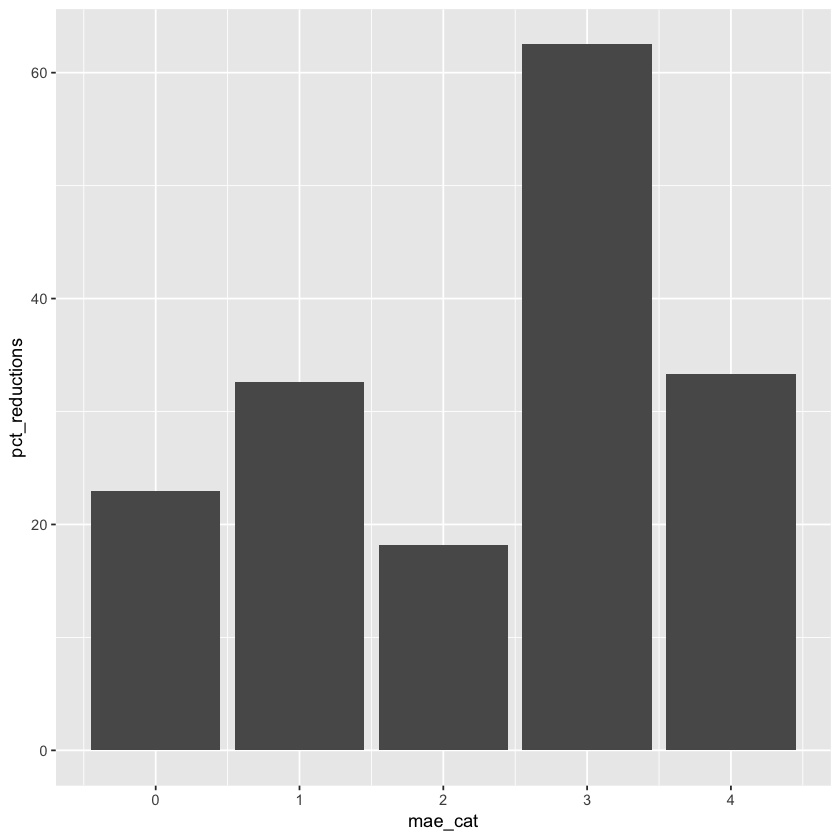

In [37]:
comparisons %>%
 ggplot(aes(x = mae_cat, y = pct_reductions)) +
 geom_bar(stat = "identity")

In [40]:
# date time exploration
maedata %>%
 group_by(Date) %>%
 summarise(summed_mae = sum(MAE)) %>%
 arrange(summed_mae)

Date,summed_mae
Oct-17,0
Sep-17,0
Dec-47,1
Nov-16,1
May-18,3
Oct-16,3
Apr-16,4
Aug-17,4
Jul-17,4
Mar-17,4


In [41]:
library(lubridate) # attach a date time data manipulation pacakge


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [95]:
# convert the Date variable to a proper date/time variable
# set the day to 15th or middle of the month (arbitrary choice)
maedata1 = maedata %>%
mutate(monthyr = dmy(paste("15-", Date, sep = "")))

In [101]:
mae_by_date = maedata1 %>%
 group_by(monthyr, B_A, `Care Level`) %>%
 summarise(summed_mae = sum(MAE)) %>%
 filter(monthyr != "2047-12-15" & monthyr != "2018-04-15" ) %>%
 arrange()

mae_by_date_spread = mae_by_date %>%
         spread(`Care Level`, summed_mae)
mae_by_date_spread

monthyr,B_A,Dementia,Intellectual,Rest Home
2016-01-15,Before,5,1,2
2016-02-15,Before,7,1,3
2016-03-15,Before,4,0,2
2016-04-15,Before,4,0,0
2016-05-15,Before,5,0,2
2016-06-15,Before,9,2,3
2016-07-15,Before,5,0,1
2016-08-15,Before,4,0,8
2016-09-15,Before,2,2,3
2016-10-15,Before,2,1,0


In [67]:
peak_errors = mae_by_date %>%
 filter(summed_mae > 10)

peak_errors

monthyr,B_A,summed_mae
2016-02-15,Before,11
2016-06-15,Before,14
2016-08-15,Before,12
2017-01-15,Before,12
2017-02-15,Before,13
2017-05-15,Before,19
2018-02-15,After,11
2018-03-15,After,13
2018-04-15,After,30


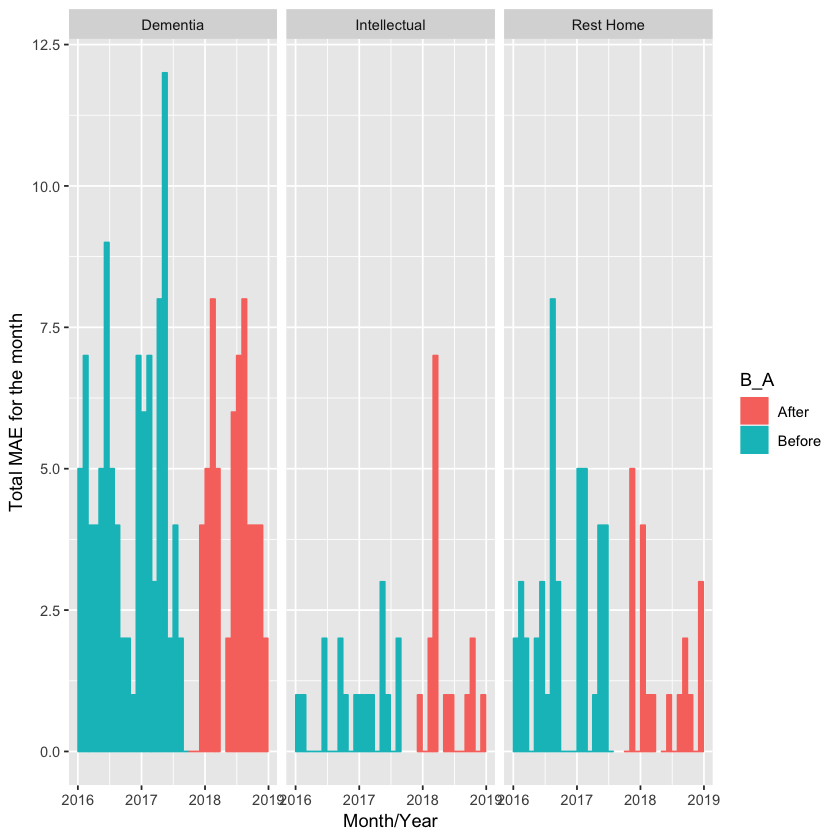

In [99]:
# Graphically explore the extent to which the 
# before and after MAEs are affected by types of care
# shows drop in dementia and rest home care, jump in intellectual disability care
# (uncover the hashtags to see line vs bar plots)

mae_by_date %>%
 ggplot(aes(x = monthyr, y = summed_mae, colour = B_A, fill = B_A)) +
 geom_bar(stat = "identity") + 
 #geom_line(stat = "identity") +
 facet_grid(. ~ `Care Level`) +
 ylab("Total MAE for the month") +
 xlab("Month/Year")